In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
data = pd.read_csv("file://localhost/E://ML\作业\ex1/ex1data2.txt", \
                  names=['Size', 'Bedrooms', 'Price'], encoding='utf-8')

In [129]:
data2 = (data - data.mean()) / data.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [130]:
def getData(dataSet):
    m, n = np.shape(dataSet)
    trainData = np.ones((m, n))
    trainData[:,:-1] = dataSet[:,:-1]  #最后一列为价格,不取，存放偏移量1
    trainLabel = dataSet[:,-1]
    return trainData, trainLabel

In [131]:
def compute_cost(X, y, theta):
    theta = theta.reshape(X.shape[1],1)
    loss = np.dot(X, theta) - y.reshape(np.max(y.shape), 1)
    return np.sum(np.power(loss,2))/(2 * X.shape[0])

In [132]:
trainData, trainLabel = getData(data2.values)

In [133]:
m, n = np.shape(trainData)
theta = np.zeros(n)
alpha = 0.01
maxIteration = 1000

In [134]:
compute_cost(trainData, trainLabel, theta)

0.48936170212765967

In [135]:
def batchGradientDescent(X, y, theta, alpha, m, maxIteration):
    theta = theta.reshape(X.shape[1],1)
    cost = np.zeros(maxIteration)
    for i in range(0, maxIteration):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y.reshape(y.shape[0], 1)
        cost[i] = np.sum(np.power(loss, 2)) / (2 * m)
#         cost[i] = compute_cost(trainData, trainLabel, theta)
        gradient = np.dot(X.T, loss) / m
#         print(gradient.shape)
        theta = theta - alpha * gradient
        
    return theta, cost

In [136]:
g, cost = batchGradientDescent(trainData, trainLabel, theta, alpha, m, \
                         maxIteration)

In [137]:
cost[-1]

0.13070351602534264

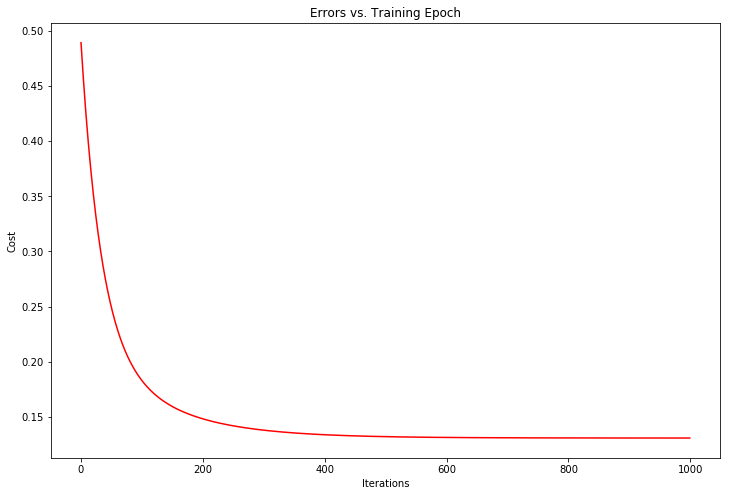

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(maxIteration), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Errors vs. Training Epoch')

In [139]:
#sklearn比对
from sklearn import linear_model
model = linear_model.Ridge(alpha=0.01, fit_intercept=False,max_iter=3000)
model.fit(trainData, trainLabel)

Ridge(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [140]:
compute_cost(trainData, trainLabel, model.coef_)

0.1306865087590473

In [141]:
model.coef_

array([  8.84476478e-01,  -5.30051810e-02,  -7.65723393e-17])

In [142]:
g.T

array([[  8.78503652e-01,  -4.69166570e-02,  -1.11134506e-16]])